In [1]:
#Assignment 1: Sales and Effectiveness Analysis
#Objective:
#Explore the relationship between marketing spend, sales, and drug effectiveness across different regions and age groups. Create visualizations using matplotlib and seaborn.
#Instructions:
#Load the dataset.
#Perform data cleaning (check for missing values, duplicates).
#Create the following visualizations:
#A bar plot showing total sales per region.
#A scatter plot to visualize the relationship between Marketing_Spend and Sales.
#A boxplot comparing drug effectiveness across different age groups.
#A line plot showing the sales trend for each product over different trial periods.
#A heatmap of the correlation between Sales, Marketing_Spend, and Effectiveness.
#Based on the visualizations, summarize any patterns or trends you observe.
#Expected Outcome:
#Insights on how marketing spend impacts sales.
#Analysis of which age groups have higher drug effectiveness.
#Regional sales distribution.
r'C:\ML\Day_13_Pharma_data.csv'

Missing values:
Product_ID         0
Product_Name       0
Region             0
Marketing_Spend    0
Sales              0
Effectiveness      0
Side_Effects       0
Age_Group          0
Trial_Period       0
dtype: int64
Columns in DataFrame:
Index(['Product_ID', 'Product_Name', 'Region', 'Marketing_Spend', 'Sales',
       'Effectiveness', 'Side_Effects', 'Age_Group', 'Trial_Period'],
      dtype='object')


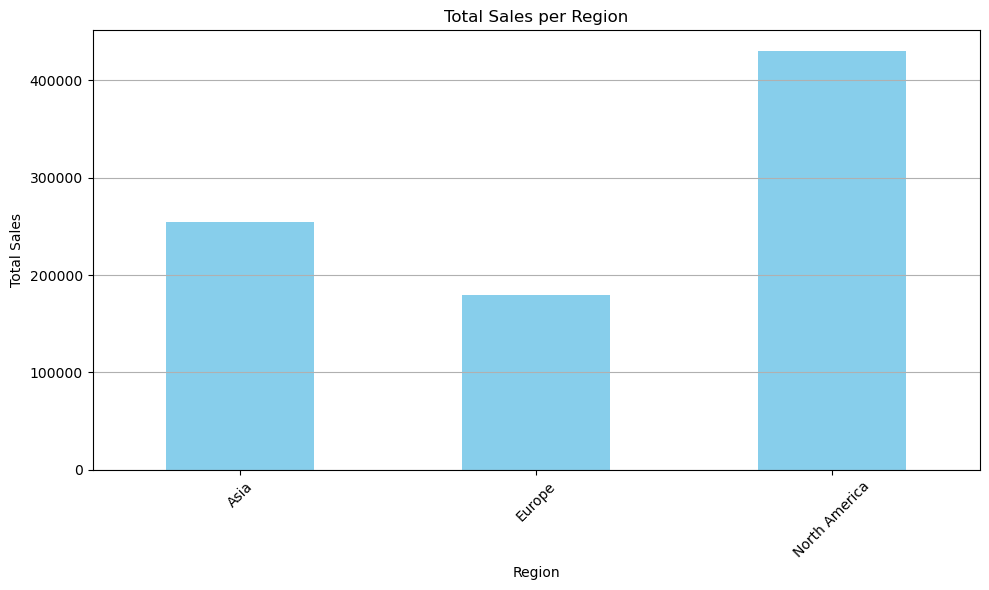

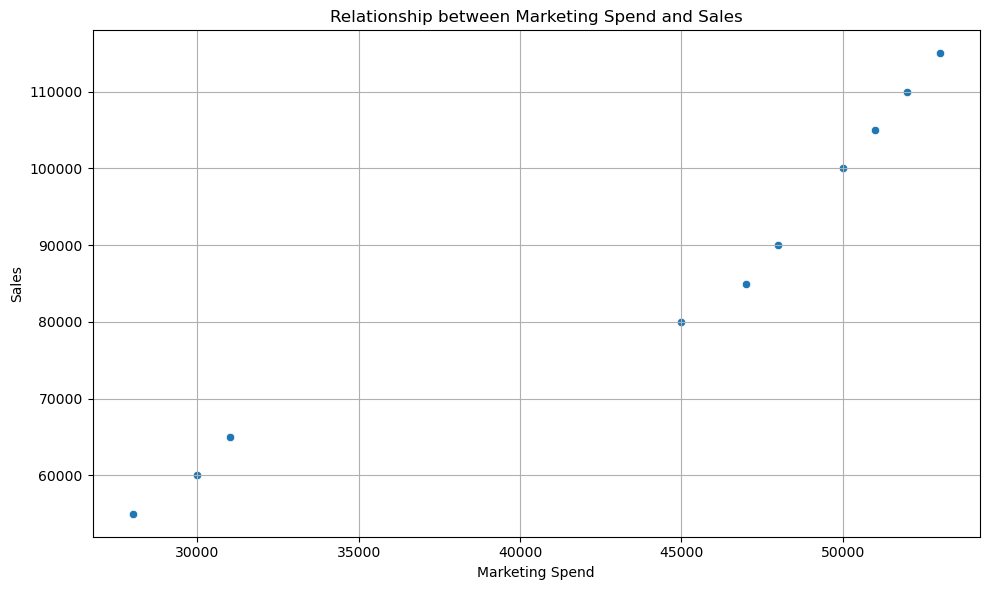

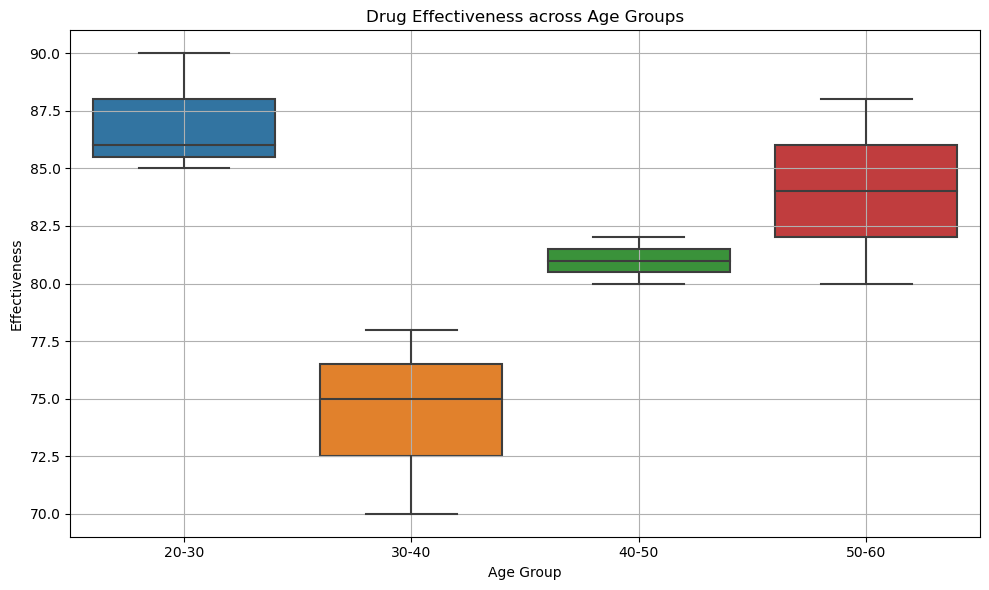

The 'Product' column is missing or contains only null values.


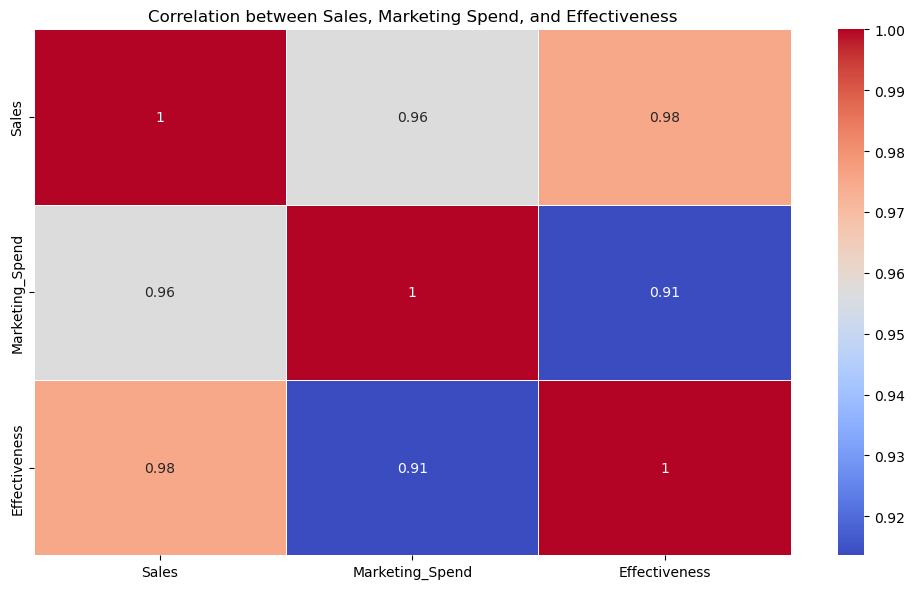

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\ML\Day_13_Pharma_data.csv' 
df = pd.read_csv(file_path)

# Data Cleaning
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Fill missing values if necessary (example: fill with mean)
df['Marketing_Spend'] = df['Marketing_Spend'].fillna(df['Marketing_Spend'].mean())
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Effectiveness'] = df['Effectiveness'].fillna(df['Effectiveness'].mean())

# Check the columns in the DataFrame
print("Columns in DataFrame:")
print(df.columns)

# Ensure 'Trial_Period' is in datetime format if applicable
if 'Trial_Period' in df.columns:
    df['Trial_Period'] = pd.to_datetime(df['Trial_Period'], errors='coerce')

# Bar plot showing total sales per region
plt.figure(figsize=(10, 6))
total_sales_per_region = df.groupby('Region')['Sales'].sum()
total_sales_per_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Scatter plot to visualize the relationship between Marketing_Spend and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Marketing_Spend', y='Sales')
plt.title('Relationship between Marketing Spend and Sales')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot comparing drug effectiveness across different age groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='Effectiveness')
plt.title('Drug Effectiveness across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Effectiveness')
plt.grid(True)
plt.tight_layout()
plt.show()

# Check if 'Product' column exists and is not empty
if 'Product' in df.columns and not df['Product'].isnull().all():
    # Line plot showing the sales trend for each product over different trial periods
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Trial_Period', y='Sales', hue='Product')
    plt.title('Sales Trend for Each Product over Different Trial Periods')
    plt.xlabel('Trial Period')
    plt.ylabel('Sales')
    plt.legend(title='Product')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("The 'Product' column is missing or contains only null values.")

# Heatmap of the correlation between Sales, Marketing_Spend, and Effectiveness
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Sales', 'Marketing_Spend', 'Effectiveness']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Sales, Marketing Spend, and Effectiveness')
plt.tight_layout()
plt.show()